# Exercise 4.10

## Imports/Pathways

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import squarify

In [2]:
# File pathway shortcut
path = r'C:\Users\Chase\anaconda_projects\Exercise 4\07-2025 Instacart Basket Analysis'

In [3]:
# Final version of main dataset
df_final_v4 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_v4.pkl'))

#### Imports used for merge

In [4]:
# Final version of main dataset
df_final_v3 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_v3.pkl'))

In [5]:
# Prepared file
# Load the final enriched dataset
df_final_v2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_v2.pkl'))

In [6]:
# Upload wrangled departments file to include department names column that's missing
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

## Inspect Data

#### df_final_v3

In [7]:
df_final_v3.shape

(32436199, 33)

In [8]:
# Header check
df_final_v3.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,...,gender,age,state,income,marital_status,num_dependents,date_joined,missing_first_name,department,product_count
0,2,33120,1,1,202279,3,5,9,8.0,False,...,Male,57,Idaho,98119,married,3,2/6/2020,False,dairy eggs,5398747.0
1,2,28985,2,1,202279,3,5,9,8.0,False,...,Male,57,Idaho,98119,married,3,2/6/2020,False,produce,9479291.0
2,2,9327,3,0,202279,3,5,9,8.0,False,...,Male,57,Idaho,98119,married,3,2/6/2020,False,pantry,1875369.0
3,2,45918,4,1,202279,3,5,9,8.0,False,...,Male,57,Idaho,98119,married,3,2/6/2020,False,pantry,1875369.0
4,2,30035,5,0,202279,3,5,9,8.0,False,...,Male,57,Idaho,98119,married,3,2/6/2020,False,pantry,1875369.0


In [9]:
print(df_final_v4.columns)

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'first_order', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range', 'busiest_day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'age',
       'state', 'income', 'marital_status', 'num_dependents', 'date_joined',
       'missing_first_name', 'department', 'product_count', 'region',
       'spending_flag_x', 'exclusion_flag', 'spending_flag_y',
       'spending_flag'],
      dtype='object')


#### df_final_v4

In [10]:
df_final_v4.shape

(32436199, 38)

In [11]:
# Header check
df_final_v4.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,...,num_dependents,date_joined,missing_first_name,department,product_count,region,spending_flag_x,exclusion_flag,spending_flag_y,spending_flag
0,2,33120,1,1,202279,3,5,9,8.0,False,...,3,2/6/2020,False,dairy eggs,5398747.0,West,Low spender,Keep,Low spender,Low spender
1,2,28985,2,1,202279,3,5,9,8.0,False,...,3,2/6/2020,False,produce,9479291.0,West,Low spender,Keep,Low spender,Low spender
2,2,9327,3,0,202279,3,5,9,8.0,False,...,3,2/6/2020,False,pantry,1875369.0,West,Low spender,Keep,Low spender,Low spender
3,2,45918,4,1,202279,3,5,9,8.0,False,...,3,2/6/2020,False,pantry,1875369.0,West,Low spender,Keep,Low spender,Low spender
4,2,30035,5,0,202279,3,5,9,8.0,False,...,3,2/6/2020,False,pantry,1875369.0,West,Low spender,Keep,Low spender,Low spender


In [12]:
print(df_final_v4.columns)

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'first_order', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range', 'busiest_day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'age',
       'state', 'income', 'marital_status', 'num_dependents', 'date_joined',
       'missing_first_name', 'department', 'product_count', 'region',
       'spending_flag_x', 'exclusion_flag', 'spending_flag_y',
       'spending_flag'],
      dtype='object')


#### df_final_v2

In [13]:
df_final_v2.shape

(32436199, 31)

In [14]:
# Header check
df_final_v2.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,...,first_name,last_name,gender,age,state,income,marital_status,num_dependents,date_joined,missing_first_name
0,2,33120,1,1,202279,3,5,9,8.0,False,...,Paul,Coleman,Male,57,Idaho,98119,married,3,2/6/2020,False
1,2,28985,2,1,202279,3,5,9,8.0,False,...,Paul,Coleman,Male,57,Idaho,98119,married,3,2/6/2020,False
2,2,9327,3,0,202279,3,5,9,8.0,False,...,Paul,Coleman,Male,57,Idaho,98119,married,3,2/6/2020,False
3,2,45918,4,1,202279,3,5,9,8.0,False,...,Paul,Coleman,Male,57,Idaho,98119,married,3,2/6/2020,False
4,2,30035,5,0,202279,3,5,9,8.0,False,...,Paul,Coleman,Male,57,Idaho,98119,married,3,2/6/2020,False


In [15]:
print(df_final_v2.columns)

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'first_order', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range', 'busiest_day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'age',
       'state', 'income', 'marital_status', 'num_dependents', 'date_joined',
       'missing_first_name'],
      dtype='object')


#### df_dept

In [16]:
df_dept.shape

(21, 3)

In [17]:
print(df_dept.columns)

Index(['department_id', 'department', 'product_count'], dtype='object')


In [18]:
df_dept.head()

,department_id,department,product_count
0,4.0,produce,9479291
1,16.0,dairy eggs,5398747
2,19.0,snacks,2887550
3,7.0,beverages,2688123
4,1.0,frozen,2234743


## Merge (use only if need to remerge or if something is messed up)

In [ ]:
# Merge the needed columns: department, product count
df_final_v2 = df_final_v2.merge(
    df_dept[['department_id', 'department', 'product_count']],
    on='department_id',
    how='left'
)

In [ ]:
print(df_final_v2[['department_id', 'department', 'product_count']].head())
print(df_final_v2.shape)

#### Export 

In [ ]:
# Export to save progress and export as v3 to keep previous works safe
df_final_v3 = df_final_v2.copy()
df_final_v3.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_v3.pkl'))

In [ ]:
# Export backup
df_final_v3.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_v3_backup.pkl'))

#### Spending Flag

Spending flag didn't make it into the exports, so recreating and exporting here

In [ ]:
# Step 1: Create spending_flag from user average price
user_avg_price = df_final_v3.groupby('user_id')['prices'].mean().reset_index()
user_avg_price['spending_flag'] = user_avg_price['prices'].apply(
    lambda x: 'High spender' if x >= 10 else 'Low spender'
)

In [ ]:
import gc
gc.collect()

In [ ]:
# Step 2: Merge into df_final_v3
df_final_v4 = df_final_v3.merge(
    user_avg_price[['user_id', 'spending_flag']],
    on='user_id',
    how='left',
    copy=False
)

In [ ]:
# Step 3: Export main version
df_final_v4.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_v4.pkl'))

In [ ]:
# Step 4: Export backup
df_final_v4.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_v4_backup.pkl'))

## Question 2

The PII (Personally Identifiable Information) risks with these dataset(s) are:
First and Last name are a direct PII and should be removed or anonymized.
Age is not alone a direct PII but combined with other information could be.
State for a location is less of a risk for PII but combined could be.
Marital Status & Dependents is not PII but sensitive information/

## Question 3

###  Region Mapping Dictionary

In [4]:
# Define the Region Mapping Dictionary
region_map = {
    # Northeast
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'New Jersey': 'Northeast',

    # Midwest
    'Wisconsin': 'Midwest', 'Michigan': 'Midwest', 'Illinois': 'Midwest',
    'Indiana': 'Midwest', 'Ohio': 'Midwest',
    'North Dakota': 'Midwest', 'South Dakota': 'Midwest', 'Nebraska': 'Midwest',
    'Kansas': 'Midwest', 'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest',

    # South
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South',
    'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South',
    'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South',
    'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South', 'Alabama': 'South',
    'Oklahoma': 'South', 'Texas': 'South', 'Arkansas': 'South', 'Louisiana': 'South',

    # West
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Nevada': 'West',
    'Utah': 'West', 'Colorado': 'West', 'Arizona': 'West', 'New Mexico': 'West',
    'Alaska': 'West', 'Washington': 'West', 'Oregon': 'West', 'California': 'West',
    'Hawaii': 'West'
}

In [5]:
# Apply the Mapping to Your DataFram
df_final_v4['region'] = df_final_v4['state'].map(region_map)

In [6]:
# Quality control checkpoint, ensure every state has a region
unmapped = df_final_v4[df_final_v4['region'].isnull()]['state'].unique()
if len(unmapped) > 0:
    print("unmapped states:", unmapped)

Looks like the code worked because no output from the qulity check, every state matched a region. 

In [7]:
# Check counts to be sure
df_final_v4['region'].value_counts(dropna=False)

region
South        10802354
West          8300889
Midwest       7604326
Northeast     5728630
Name: count, dtype: int64

### Spending Habits by Region

In [8]:
region_spending = pd.crosstab(df_final_v4['region'], df_final_v4['spending_flag'], normalize='index') * 100

In [9]:
print(region_spending.round(2))

spending_flag  High spender  Low spender
region                                  
Midwest                0.38        99.62
Northeast              0.33        99.67
South                  0.38        99.62
West                   0.38        99.62


Looking at the above data there isn't much of a spending difference between the regions. Majority of the customers are low spenders

## Question 4

### Exclusion Flag

In [10]:
# Create the Exclusion Flag
df_final_v4['exclusion_flag'] = np.where(df_final_v4['max_order'] < 5, 'Exclude', 'Keep')

In [11]:
# Work check, ensuring the exclusion flag worked
print(df_final_v4.columns)

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'first_order', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range', 'busiest_day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'age',
       'state', 'income', 'marital_status', 'num_dependents', 'date_joined',
       'missing_first_name', 'department', 'product_count', 'region',
       'spending_flag_x', 'exclusion_flag', 'spending_flag_y',
       'spending_flag'],
      dtype='object')


In [12]:
# Filter to keep only active customers
df_keep_sample = df_final_v4[df_final_v4['exclusion_flag'] == 'Keep']

In [13]:
# Count of each category
exclusion_counts = df_final_v4['exclusion_flag'].value_counts()

# Percentage of each category
exclusion_percentages = df_final_v4['exclusion_flag'].value_counts(normalize=True) * 100

# Combine into a single DataFrame
exclusion_summary = pd.DataFrame({
    'Count': exclusion_counts,
    'Percentage': exclusion_percentages.round(2)
})

# Display the result
print(exclusion_summary)

                   Count  Percentage
exclusion_flag                      
Keep            30994535       95.56
Exclude          1441664        4.44


In [14]:
# Export
df_keep_sample.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'keep_sample_excluded_low_activity.pkl'))

## Question 5

### Customer Profiles

#### Ranges/Department Names

In [15]:
df_final_v4[['age', 'income', 'num_dependents']].describe().round(0)

,age,income,num_dependents
count,32436199.0,32436199.0,32436199.0
mean,49.0,99436.0,2.0
std,18.0,43056.0,1.0
min,18.0,25903.0,0.0
25%,33.0,67002.0,1.0
50%,49.0,96612.0,2.0
75%,65.0,127908.0,3.0
max,81.0,593901.0,3.0


Age range: 18 - 81. 
income range: 25,903 - 593,901. 
num_dependents range: 0 - 3

In [16]:
print(df_final_v4['department'].unique())

['dairy eggs' 'produce' 'pantry' 'meat seafood' 'bakery' 'personal care'
 'snacks' 'breakfast' 'beverages' 'deli' 'household' 'international'
 'dry goods pasta' 'frozen' 'canned goods' 'babies' 'pets' 'alcohol'
 'bulk' nan 'missing' 'other']


#### Age Groups

In [17]:
# Create bins for the age groups based on ranges
age_bins = [0, 30, 45, 60, 100]

In [18]:
# Labels for the bins
age_labels = ['Young Adult', 'Midlife Adult', 'Older Adult', 'Senior']

In [19]:
# Create a new column called Age Group
df_final_v4['age_group'] = pd.cut(df_final_v4['age'], bins=age_bins, labels=age_labels)

In [20]:
# Work check
df_final_v4[['age', 'age_group']].head(10)

,age,age_group
0,57,Older Adult
1,57,Older Adult
2,57,Older Adult
3,57,Older Adult
4,57,Older Adult
5,57,Older Adult
6,57,Older Adult
7,57,Older Adult
8,57,Older Adult
9,43,Midlife Adult


In [21]:
# Customer count per age group
df_final_v4['age_group'].value_counts().sort_index()

age_group
Young Adult       6605959
Midlife Adult     7608980
Older Adult       7628342
Senior           10592918
Name: count, dtype: int64

#### Income Groups

In [22]:
# Income bins based on ranges
income_bins = [0, 70000, 100000, 150000, 600000]

In [23]:
# Income group labels
income_labels = ['Low Income', 'Middle Income', 'High Income', 'Very High Income']

In [24]:
# Create income group label
df_final_v4['income_group'] = pd.cut(df_final_v4['income'], bins=income_bins, labels=income_labels)

In [25]:
# Work check
df_final_v4[['income', 'income_group']].head(10)

,income,income_group
0,98119,Middle Income
1,98119,Middle Income
2,98119,Middle Income
3,98119,Middle Income
4,98119,Middle Income
5,98119,Middle Income
6,98119,Middle Income
7,98119,Middle Income
8,98119,Middle Income
9,149831,High Income


In [26]:
# Income counts per group
df_final_v4['income_group'].value_counts().sort_index()

income_group
Low Income           9005116
Middle Income        8603363
High Income         10773096
Very High Income     4054624
Name: count, dtype: int64

#### Dependent Groups

In [27]:
# Create dependent bins
dep_bins = [0, 1, 3, df_final_v4['num_dependents'].max() + 1]

In [28]:
# Dependent group labels
dep_labels = ['None', 'Few (1–2)', 'Many (3+)']

In [29]:
# Creating dependent group column
df_final_v4['dep_group'] = pd.cut(df_final_v4['num_dependents'], bins=dep_bins, labels=dep_labels, right=False)

In [30]:
# Work check
df_final_v4[['num_dependents', 'dep_group']].head(10)

,num_dependents,dep_group
0,3,Many (3+)
1,3,Many (3+)
2,3,Many (3+)
3,3,Many (3+)
4,3,Many (3+)
5,3,Many (3+)
6,3,Many (3+)
7,3,Many (3+)
8,3,Many (3+)
9,2,Few (1–2)


In [31]:
# Dependent counts per group
df_final_v4['dep_group'].value_counts().sort_index()

dep_group
None          8105551
Few (1–2)    16187747
Many (3+)     8142901
Name: count, dtype: int64

#### Parent Flag

In [32]:
# Create parent flag column
df_final_v4['parent_flag'] = df_final_v4['num_dependents'].apply(lambda x: 'Yes' if x > 0 else 'No')

In [33]:
# Work check
df_final_v4[['num_dependents', 'parent_flag']].head(10)

,num_dependents,parent_flag
0,3,Yes
1,3,Yes
2,3,Yes
3,3,Yes
4,3,Yes
5,3,Yes
6,3,Yes
7,3,Yes
8,3,Yes
9,2,Yes


In [34]:
# Parent flag counts
df_final_v4['parent_flag'].value_counts()

parent_flag
Yes    24330648
No      8105551
Name: count, dtype: int64

### Departments

In [35]:
# List of departments
sorted(df_final_v4['department'].dropna().unique())

['alcohol',
 'babies',
 'bakery',
 'beverages',
 'breakfast',
 'bulk',
 'canned goods',
 'dairy eggs',
 'deli',
 'dry goods pasta',
 'frozen',
 'household',
 'international',
 'meat seafood',
 'missing',
 'other',
 'pantry',
 'personal care',
 'pets',
 'produce',
 'snacks']

Create groups of depts to help id the type of customers

In [36]:
# Create family_depts grouping
family_depts = ['babies', 'bulk', 'household', 'pantry', 'personal care']

In [37]:
# Create fresh_depts
fresh_depts = ['produce', 'meat seafood', 'dairy eggs']

In [38]:
# Create convenience_depts grouping
convenience_depts = ['frozen', 'snacks', 'canned goods', 'breakfast']

In [39]:
# Create lifestyle_depts grouping
lifestyle_depts = ['alcohol', 'pets', 'international', 'bakery']

In [40]:
# Create other_depts grouping, a catch all for the remaining of depts
other_depts = ['dry goods pasta', 'deli', 'missing', 'other']

In [41]:
# This applies the grouping to each row depending on the customer's purchase
def assign_dept_group(dept):
    if dept in family_depts:
        return 'Family'
    elif dept in fresh_depts:
        return 'Fresh'
    elif dept in convenience_depts:
        return 'Convenience'
    elif dept in lifestyle_depts:
        return 'Lifestyle'
    else:
        return 'Other'

In [42]:
# Create the dept_group column
df_final_v4['dept_group'] = df_final_v4['department'].apply(assign_dept_group)

In [43]:
# Work check
df_final_v4.head(10)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,...,region,spending_flag_x,exclusion_flag,spending_flag_y,spending_flag,age_group,income_group,dep_group,parent_flag,dept_group
0,2,33120,1,1,202279,3,5,9,8.0,False,...,West,Low spender,Keep,Low spender,Low spender,Older Adult,Middle Income,Many (3+),Yes,Fresh
1,2,28985,2,1,202279,3,5,9,8.0,False,...,West,Low spender,Keep,Low spender,Low spender,Older Adult,Middle Income,Many (3+),Yes,Fresh
2,2,9327,3,0,202279,3,5,9,8.0,False,...,West,Low spender,Keep,Low spender,Low spender,Older Adult,Middle Income,Many (3+),Yes,Family
3,2,45918,4,1,202279,3,5,9,8.0,False,...,West,Low spender,Keep,Low spender,Low spender,Older Adult,Middle Income,Many (3+),Yes,Family
4,2,30035,5,0,202279,3,5,9,8.0,False,...,West,Low spender,Keep,Low spender,Low spender,Older Adult,Middle Income,Many (3+),Yes,Family
5,2,17794,6,1,202279,3,5,9,8.0,False,...,West,Low spender,Keep,Low spender,Low spender,Older Adult,Middle Income,Many (3+),Yes,Fresh
6,2,40141,7,1,202279,3,5,9,8.0,False,...,West,Low spender,Keep,Low spender,Low spender,Older Adult,Middle Income,Many (3+),Yes,Family
7,2,1819,8,1,202279,3,5,9,8.0,False,...,West,Low spender,Keep,Low spender,Low spender,Older Adult,Middle Income,Many (3+),Yes,Family
8,2,43668,9,0,202279,3,5,9,8.0,False,...,West,Low spender,Keep,Low spender,Low spender,Older Adult,Middle Income,Many (3+),Yes,Fresh
9,3,33754,1,1,205970,16,5,17,12.0,False,...,West,Low spender,Keep,Low spender,Low spender,Midlife Adult,High Income,Few (1–2),Yes,Fresh


Looks like it's working

### Customer Summary

In [44]:
# Create a customer summary
customer_summary = df_final_v4.groupby('user_id')[['age_group', 'income_group', 'dep_group', 'parent_flag']].first().reset_index()

In [45]:
# Work check
customer_summary.head(10)

,user_id,age_group,income_group,dep_group,parent_flag
0,1,Midlife Adult,Low Income,Many (3+),Yes
1,2,Senior,Low Income,Many (3+),Yes
2,3,Midlife Adult,Middle Income,Many (3+),Yes
3,4,Midlife Adult,Low Income,Many (3+),Yes
4,5,Senior,High Income,None,No
5,6,Older Adult,High Income,Few (1–2),Yes
6,7,Midlife Adult,Middle Income,Few (1–2),Yes
7,8,Midlife Adult,Middle Income,Few (1–2),Yes
8,9,Senior,Very High Income,Many (3+),Yes
9,10,Midlife Adult,Low Income,Few (1–2),Yes


In [46]:
customer_summary.isna().sum()

user_id         0
age_group       0
income_group    0
dep_group       0
parent_flag     0
dtype: int64

Looks good

### Customer Department Summary

In [47]:
# Summarize cust buying behavior per dept
cust_dept_sum = df_final_v4.groupby('user_id')['dept_group'].value_counts().unstack(fill_value=0)

In [48]:
# Work check
cust_dept_sum.head(10)

dept_group,Convenience,Family,Fresh,Lifestyle,Other
user_id,,,,,
1,25,3,18,0,13
2,63,12,85,5,30
3,15,5,59,0,9
4,5,2,2,4,5
5,4,2,27,2,2
6,3,1,10,0,0
7,29,10,97,6,64
8,5,3,39,1,1
9,18,11,32,4,11


Looks good

In [49]:
# Check missing values
cust_dept_sum.isna().sum()

dept_group
Convenience    0
Family         0
Fresh          0
Lifestyle      0
Other          0
dtype: int64

### Behavioral Flags

Creating flags to eventually create a summary and place each cust in a cateogry of shopper

In [50]:
# Flag for Family-oriented purchases
cust_dept_sum['family_goods_flag'] = (cust_dept_sum['Family'] > 0).astype(int)

In [51]:
# Flag for Fresh food purchases
cust_dept_sum['fresh_flag'] = (cust_dept_sum['Fresh'] > 0).astype(int)

In [52]:
# Flag for Convenience-focused purchases
cust_dept_sum['convenience_flag'] = (cust_dept_sum['Convenience'] > 0).astype(int)

In [53]:
# Flag for Lifestyle/specialty purchases
cust_dept_sum['lifestyle_flag'] = (cust_dept_sum['Lifestyle'] > 0).astype(int)

In [54]:
# Flag for Other/unclassified purchases
cust_dept_sum['other_flag'] = (cust_dept_sum['Other'] > 0).astype(int)

### Merge Flags with Customer Traits

In [55]:
# Create the merge
customer_summary = customer_summary.merge(
    cust_dept_sum[['family_goods_flag', 'fresh_flag', 'convenience_flag', 'lifestyle_flag', 'other_flag']],
    on='user_id',
    how='left'
)

In [56]:
customer_summary.head(10)

,user_id,age_group,income_group,dep_group,parent_flag,family_goods_flag,fresh_flag,convenience_flag,lifestyle_flag,other_flag
0,1,Midlife Adult,Low Income,Many (3+),Yes,1,1,1,0,1
1,2,Senior,Low Income,Many (3+),Yes,1,1,1,1,1
2,3,Midlife Adult,Middle Income,Many (3+),Yes,1,1,1,0,1
3,4,Midlife Adult,Low Income,Many (3+),Yes,1,1,1,1,1
4,5,Senior,High Income,None,No,1,1,1,1,1
5,6,Older Adult,High Income,Few (1–2),Yes,1,1,1,0,0
6,7,Midlife Adult,Middle Income,Few (1–2),Yes,1,1,1,1,1
7,8,Midlife Adult,Middle Income,Few (1–2),Yes,1,1,1,1,1
8,9,Senior,Very High Income,Many (3+),Yes,1,1,1,1,1
9,10,Midlife Adult,Low Income,Few (1–2),Yes,1,1,1,1,1


### Time Traits

In [57]:
# Putting hours of day into buckets
def hour_bucket(hour):
    if hour < 8:
        return 'Early'
    elif hour < 12:
        return 'Morning'
    elif hour < 17:
        return 'Afternoon'
    elif hour < 20:
        return 'Evening'
    else:
        return 'Late Night'

In [58]:
# Define weekends vs weekdays
def day_bucket(day):
    return 'Weekend' if day in [0, 1] else 'Weekday'

In [59]:
# Create hour bucket column
df_final_v4['hour_bucket'] = df_final_v4['order_hour_of_day'].apply(hour_bucket)

In [60]:
# Create day_bucket column
df_final_v4['day_bucket'] = df_final_v4['orders_day_of_week'].apply(day_bucket)

In [61]:
# Work check
df_final_v4[['orders_day_of_week', 'day_bucket']].head(10)

,orders_day_of_week,day_bucket
0,5,Weekday
1,5,Weekday
2,5,Weekday
3,5,Weekday
4,5,Weekday
5,5,Weekday
6,5,Weekday
7,5,Weekday
8,5,Weekday
9,5,Weekday


In [62]:
# Work check
df_final_v4[['order_hour_of_day', 'hour_bucket']].head(10)

,order_hour_of_day,hour_bucket
0,9,Morning
1,9,Morning
2,9,Morning
3,9,Morning
4,9,Morning
5,9,Morning
6,9,Morning
7,9,Morning
8,9,Morning
9,17,Evening


In [63]:
# Create peak hours flag
peak_hours = [10, 11, 13, 14, 15]
df_final_v4['peak_hour_flag'] = df_final_v4['order_hour_of_day'].apply(lambda x: 1 if x in peak_hours else 0)

In [64]:
# Create quiet day flag
quiet_days = [3, 4]  # Tuesday, Wednesday
df_final_v4['quiet_day_flag'] = df_final_v4['orders_day_of_week'].apply(lambda x: 1 if x in quiet_days else 0)

In [65]:
# Agg time traits per customer
time_traits = df_final_v4.groupby('user_id')[['hour_bucket', 'day_bucket', 'peak_hour_flag', 'quiet_day_flag']].agg(lambda x: x.mode()[0]).reset_index()

In [66]:
# Merge the time traits into customer_summary
customer_summary = customer_summary.merge(time_traits, on='user_id', how='left')

In [67]:
# Work check
df_final_v4[['order_hour_of_day', 'hour_bucket', 'orders_day_of_week', 'day_bucket']].head(10)

,order_hour_of_day,hour_bucket,orders_day_of_week,day_bucket
0,9,Morning,5,Weekday
1,9,Morning,5,Weekday
2,9,Morning,5,Weekday
3,9,Morning,5,Weekday
4,9,Morning,5,Weekday
5,9,Morning,5,Weekday
6,9,Morning,5,Weekday
7,9,Morning,5,Weekday
8,9,Morning,5,Weekday
9,17,Evening,5,Weekday


In [68]:
# Work check
df_final_v4[['peak_hour_flag', 'quiet_day_flag']].value_counts()

peak_hour_flag  quiet_day_flag
0               0                 14324007
1               0                 10480542
0               1                  4589004
1               1                  3042646
Name: count, dtype: int64

In [69]:
# Work check
time_traits.head()

,user_id,hour_bucket,day_bucket,peak_hour_flag,quiet_day_flag
0,1,Afternoon,Weekday,0,1
1,2,Morning,Weekday,1,0
2,3,Afternoon,Weekend,0,0
3,4,Afternoon,Weekday,1,0
4,5,Afternoon,Weekend,0,0


In [70]:
df_final_v4.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,...,spending_flag,age_group,income_group,dep_group,parent_flag,dept_group,hour_bucket,day_bucket,peak_hour_flag,quiet_day_flag
0,2,33120,1,1,202279,3,5,9,8.0,False,...,Low spender,Older Adult,Middle Income,Many (3+),Yes,Fresh,Morning,Weekday,0,0
1,2,28985,2,1,202279,3,5,9,8.0,False,...,Low spender,Older Adult,Middle Income,Many (3+),Yes,Fresh,Morning,Weekday,0,0
2,2,9327,3,0,202279,3,5,9,8.0,False,...,Low spender,Older Adult,Middle Income,Many (3+),Yes,Family,Morning,Weekday,0,0
3,2,45918,4,1,202279,3,5,9,8.0,False,...,Low spender,Older Adult,Middle Income,Many (3+),Yes,Family,Morning,Weekday,0,0
4,2,30035,5,0,202279,3,5,9,8.0,False,...,Low spender,Older Adult,Middle Income,Many (3+),Yes,Family,Morning,Weekday,0,0


### Time Portfilo

In [71]:
# Create time portfilo labels 
def assign_time_profile(row):
    if row['day_bucket'] == 'Weekend' and row['peak_hour_flag'] == 1:
        return 'Weekend Peak Shopper'
    elif row['day_bucket'] == 'Weekday' and row['hour_bucket'] == 'Evening':
        return 'Evening Weekday Shopper'
    elif row['day_bucket'] == 'Weekday' and row['hour_bucket'] == 'Morning':
        return 'Weekday Morning Regular'
    elif row['quiet_day_flag'] == 1:
        return 'Quiet-Time Shopper'
    else:
        return 'Mixed-Time Shopper'

In [72]:
# Assign labels per customer
customer_summary['time_profile'] = customer_summary.apply(assign_time_profile, axis=1)

### Customer Type Labels

In [73]:
# Creates a customer type label based on age group, income level, and parent status
def customer_type(row):
    if row['parent_flag'] == 'Yes' and row['income_group'] in ['High Income', 'Very High Income']:
        return 'Affluent Parent'
    elif row['age_group'] == 'Young Adult':
        return 'Young Adult Shopper'
    elif row['age_group'] == 'Midlife Adult':
        return 'Midlife Shopper'
    else:
        return 'General Customer'

In [74]:
# Assign the labels
customer_summary['customer_type'] = customer_summary.apply(customer_type, axis=1)

In [75]:
# Work check
print(customer_summary[['user_id', 'age_group', 'income_group', 'parent_flag', 'customer_type']].head(10))

   user_id      age_group      income_group parent_flag     customer_type
0        1  Midlife Adult        Low Income         Yes   Midlife Shopper
1        2         Senior        Low Income         Yes  General Customer
2        3  Midlife Adult     Middle Income         Yes   Midlife Shopper
3        4  Midlife Adult        Low Income         Yes   Midlife Shopper
4        5         Senior       High Income          No  General Customer
5        6    Older Adult       High Income         Yes   Affluent Parent
6        7  Midlife Adult     Middle Income         Yes   Midlife Shopper
7        8  Midlife Adult     Middle Income         Yes   Midlife Shopper
8        9         Senior  Very High Income         Yes   Affluent Parent
9       10  Midlife Adult        Low Income         Yes   Midlife Shopper


### Shopper Type Assignment

In [76]:
# Shopper Type Assignment labels
def assign_shopper_type(row):
    if row['family_goods_flag'] == 1:
        return 'Family-Oriented Shopper'
    elif row['fresh_flag'] == 1:
        return 'Fresh Food Enthusiast'
    elif row['convenience_flag'] == 1:
        return 'Convenience Seeker'
    elif row['lifestyle_flag'] == 1:
        return 'Lifestyle Shopper'
    else:
        return 'General Shopper'

In [77]:
# Assign the shopper type labels
customer_summary['shopper_type'] = customer_summary.apply(assign_shopper_type, axis=1)

### Create Persona Column

In [78]:
# Combine all the previous work into one persona per customer
customer_summary['persona'] = (
    customer_summary['customer_type'] + ' – ' +
    customer_summary['shopper_type'] + ' – ' +
    customer_summary['time_profile']
)

In [79]:
# Ensure user_id is string in both
df_final_v4['user_id'] = df_final_v4['user_id'].astype(str)
customer_summary['user_id'] = customer_summary['user_id'].astype(str)

# Create mapping dictionary
persona_map = customer_summary.set_index('user_id')['persona'].to_dict()

# Add persona column via map (no merge!)
df_final_v4['persona'] = df_final_v4['user_id'].map(persona_map)

In [80]:
# _with_persona
df_final_v4.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_v4_with_persona.csv'), index=False)

KeyboardInterrupt: 

#### Work Check 

In [81]:
# Total work check
print(customer_summary.columns.tolist())

['user_id', 'age_group', 'income_group', 'dep_group', 'parent_flag', 'family_goods_flag', 'fresh_flag', 'convenience_flag', 'lifestyle_flag', 'other_flag', 'hour_bucket', 'day_bucket', 'peak_hour_flag', 'quiet_day_flag', 'time_profile', 'customer_type', 'shopper_type', 'persona']


In [82]:
customer_summary[['user_id', 'customer_type', 'shopper_type', 'time_profile', 'persona']].head(10)

,user_id,customer_type,shopper_type,time_profile,persona
0,1,Midlife Shopper,Family-Oriented Shopper,Quiet-Time Shopper,Midlife Shopper – Family-Oriented Shopper – Qu...
1,2,General Customer,Family-Oriented Shopper,Weekday Morning Regular,General Customer – Family-Oriented Shopper – W...
2,3,Midlife Shopper,Family-Oriented Shopper,Mixed-Time Shopper,Midlife Shopper – Family-Oriented Shopper – Mi...
3,4,Midlife Shopper,Family-Oriented Shopper,Mixed-Time Shopper,Midlife Shopper – Family-Oriented Shopper – Mi...
4,5,General Customer,Family-Oriented Shopper,Mixed-Time Shopper,General Customer – Family-Oriented Shopper – M...
5,6,Affluent Parent,Family-Oriented Shopper,Mixed-Time Shopper,Affluent Parent – Family-Oriented Shopper – Mi...
6,7,Midlife Shopper,Family-Oriented Shopper,Mixed-Time Shopper,Midlife Shopper – Family-Oriented Shopper – Mi...
7,8,Midlife Shopper,Family-Oriented Shopper,Mixed-Time Shopper,Midlife Shopper – Family-Oriented Shopper – Mi...
8,9,Affluent Parent,Family-Oriented Shopper,Mixed-Time Shopper,Affluent Parent – Family-Oriented Shopper – Mi...
9,10,Midlife Shopper,Family-Oriented Shopper,Mixed-Time Shopper,Midlife Shopper – Family-Oriented Shopper – Mi...


In [83]:
customer_summary['persona'].value_counts()

persona
Affluent Parent – Family-Oriented Shopper – Mixed-Time Shopper         34536
General Customer – Family-Oriented Shopper – Mixed-Time Shopper        29446
Young Adult Shopper – Family-Oriented Shopper – Mixed-Time Shopper     20905
Midlife Shopper – Family-Oriented Shopper – Mixed-Time Shopper         19929
Affluent Parent – Family-Oriented Shopper – Weekday Morning Regular    12346
                                                                       ...  
Midlife Shopper – Lifestyle Shopper – Evening Weekday Shopper              2
General Customer – Lifestyle Shopper – Weekend Peak Shopper                2
Affluent Parent – Lifestyle Shopper – Evening Weekday Shopper              2
Midlife Shopper – Lifestyle Shopper – Weekend Peak Shopper                 1
Affluent Parent – Lifestyle Shopper – Weekend Peak Shopper                 1
Name: count, Length: 100, dtype: int64

## Question 6

#### Visualization

In [84]:
# Count the number of customers per persona
persona_counts = customer_summary['persona'].value_counts().sort_values()
print(persona_counts)

persona
Affluent Parent – Lifestyle Shopper – Weekend Peak Shopper                 1
Midlife Shopper – Lifestyle Shopper – Weekend Peak Shopper                 1
Affluent Parent – Lifestyle Shopper – Evening Weekday Shopper              2
Midlife Shopper – Lifestyle Shopper – Evening Weekday Shopper              2
General Customer – Lifestyle Shopper – Weekend Peak Shopper                2
                                                                       ...  
Affluent Parent – Family-Oriented Shopper – Weekday Morning Regular    12346
Midlife Shopper – Family-Oriented Shopper – Mixed-Time Shopper         19929
Young Adult Shopper – Family-Oriented Shopper – Mixed-Time Shopper     20905
General Customer – Family-Oriented Shopper – Mixed-Time Shopper        29446
Affluent Parent – Family-Oriented Shopper – Mixed-Time Shopper         34536
Name: count, Length: 100, dtype: int64


Since there are 100 different personas I will narrow this number down to the top 10.

In [85]:
# Top 10 Customer Personas
top_personas = customer_summary['persona'].value_counts().sort_values(ascending=False).head(10)

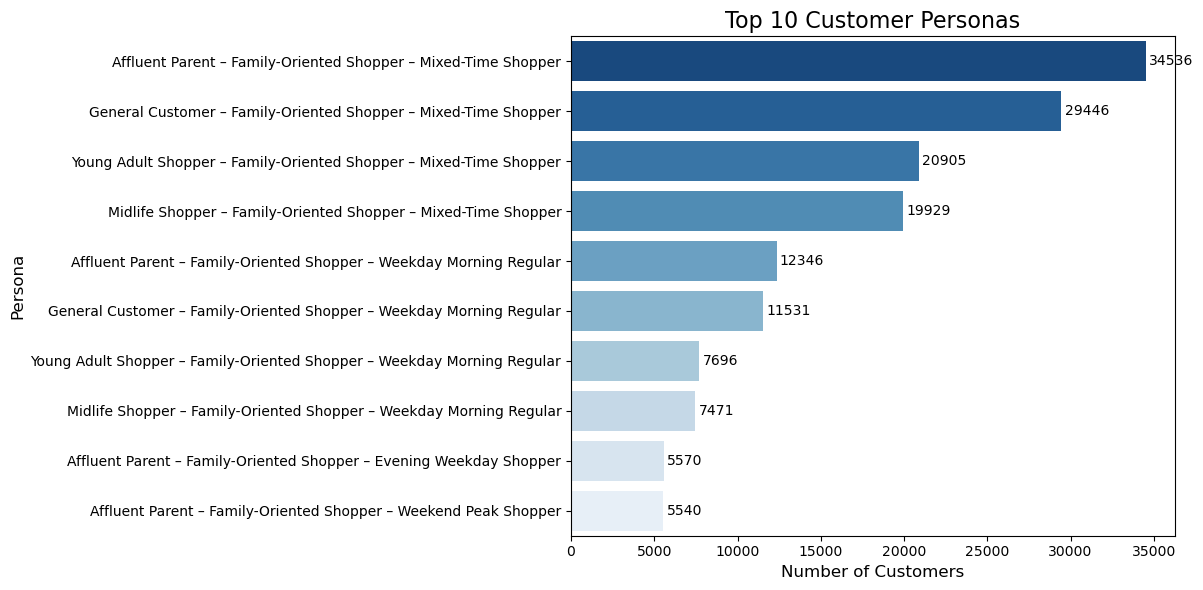

In [86]:
# Creating the horizontal bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=top_personas.values,
    y=top_personas.index,
    hue=top_personas.index,
    dodge=False,
    palette='Blues_r',
    legend=False
)

# Annotate bars
for i, value in enumerate(top_personas.values):
    ax.text(value + 200, i, str(value), va='center', fontsize=10)

# Labels and title
plt.title('Top 10 Customer Personas', fontsize=16)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Persona', fontsize=12)

# Export chart BEFORE showing it
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top_10_personas_chart.png'), dpi=300, bbox_inches='tight')

# Show chart
plt.show()

## Question 7

In [87]:
# Agg per user
user_metrics = df_final_v4.groupby('user_id').agg({
    'order_number': ['max', 'mean', 'min'],
    'prices': ['sum', 'mean', 'max']
}).reset_index()

In [88]:
# Flatten the column names, the above code is mult leveled
user_metrics.columns = ['user_id'] + [f'{col[0]}_{col[1]}' for col in user_metrics.columns[1:]]

In [89]:
# Merge persona labels
user_metrics = user_metrics.merge(
    customer_summary[['user_id', 'persona']],
    on='user_id',
    how='left'
)

In [90]:
# Agg by persona
persona_metrics = user_metrics.groupby('persona').agg({
    'order_number_max': 'max',
    'order_number_mean': 'mean',
    'order_number_min': 'min',
    'prices_sum': 'mean',
    'prices_mean': 'mean',
    'prices_max': 'max'
}).reset_index()

In [91]:
# Work check
persona_metrics.head(10)

,persona,order_number_max,order_number_mean,order_number_min,prices_sum,prices_mean,prices_max
0,Affluent Parent – Convenience Seeker – Evening...,10,2.926916,1,100.133333,8.854062,14.9
1,Affluent Parent – Convenience Seeker – Mixed-T...,27,4.489687,1,180.085135,8.506878,15.0
2,Affluent Parent – Convenience Seeker – Quiet-T...,10,3.201541,1,177.835714,8.706555,15.0
3,Affluent Parent – Convenience Seeker – Weekday...,44,4.013105,1,148.436111,8.584715,15.0
4,Affluent Parent – Convenience Seeker – Weekend...,6,2.232270,1,99.555556,8.749290,14.9
5,Affluent Parent – Family-Oriented Shopper – Ev...,99,7.445955,1,1076.415691,8.064998,25.0
6,Affluent Parent – Family-Oriented Shopper – Mi...,99,9.372482,1,1505.888574,8.054917,25.0
7,Affluent Parent – Family-Oriented Shopper – Qu...,99,5.457730,1,830.814092,8.065187,25.0
8,Affluent Parent – Family-Oriented Shopper – We...,99,10.354503,1,1623.390693,8.027849,25.0
9,Affluent Parent – Family-Oriented Shopper – We...,99,6.520664,1,1165.228339,8.076790,25.0


## Question 8

#### Merge Needed Columns

In [92]:
# Extract region per user from df_final
user_region = df_final_v4[['user_id', 'region']].drop_duplicates()

In [93]:
# Merge region into customer_summary
customer_summary = customer_summary.merge(user_region, on='user_id', how='left')

In [94]:
# Work check
print(customer_summary[['user_id', 'persona', 'region']].drop_duplicates().head())

  user_id                                            persona region
0       1  Midlife Shopper – Family-Oriented Shopper – Qu...  South
1       2  General Customer – Family-Oriented Shopper – W...   West
2       3  Midlife Shopper – Family-Oriented Shopper – Mi...   West
3       4  Midlife Shopper – Family-Oriented Shopper – Mi...  South
4       5  General Customer – Family-Oriented Shopper – M...   West


#### Count Customers by Region and Persona

In [95]:
# Count how many customers of each persona exist in each region
region_profile_counts = customer_summary.groupby(['region', 'persona']).size().reset_index(name='count')

In [96]:
# Find the top profiles
region_profile_counts.sort_values(by='count', ascending=False).head(10)

,region,persona,count
191,South,Affluent Parent – Family-Oriented Shopper – Mi...,11339
214,South,General Customer – Family-Oriented Shopper – M...,9736
288,West,Affluent Parent – Family-Oriented Shopper – Mi...,8796
6,Midwest,Affluent Parent – Family-Oriented Shopper – Mi...,8304
312,West,General Customer – Family-Oriented Shopper – M...,7528
263,South,Young Adult Shopper – Family-Oriented Shopper ...,7003
30,Midwest,General Customer – Family-Oriented Shopper – M...,6901
238,South,Midlife Shopper – Family-Oriented Shopper – Mi...,6711
99,Northeast,Affluent Parent – Family-Oriented Shopper – Mi...,6097
358,West,Young Adult Shopper – Family-Oriented Shopper ...,5457


#### Count Customer by Departments and Personas

In [97]:
# Count how many times each user interacted with each department
user_dept_counts = df_final_v4.groupby(['user_id', 'department']).size().reset_index(name='count')

In [98]:
# Merge persona into the department summary
user_dept_counts = user_dept_counts.merge(
    customer_summary[['user_id', 'persona']],
    on='user_id',
    how='left'
)

In [99]:
# Count total interactions per persona–department combo
dept_profile_counts = user_dept_counts.groupby(['department', 'persona'])['count'].sum().reset_index()

In [100]:
# Work check
dept_profile_counts.sort_values(by='count', ascending=False).head(10)

,department,persona,count
975,produce,Affluent Parent – Family-Oriented Shopper – Mi...,1947955
985,produce,General Customer – Family-Oriented Shopper – M...,1448442
1005,produce,Young Adult Shopper – Family-Oriented Shopper ...,1128118
403,dairy eggs,Affluent Parent – Family-Oriented Shopper – Mi...,1095408
995,produce,Midlife Shopper – Family-Oriented Shopper – Mi...,1069211
413,dairy eggs,General Customer – Family-Oriented Shopper – M...,819571
977,produce,Affluent Parent – Family-Oriented Shopper – We...,743764
433,dairy eggs,Young Adult Shopper – Family-Oriented Shopper ...,629326
423,dairy eggs,Midlife Shopper – Family-Oriented Shopper – Mi...,592377
987,produce,General Customer – Family-Oriented Shopper – W...,564464


## Question 9

### Visualization

#### Persona Distribution by Region

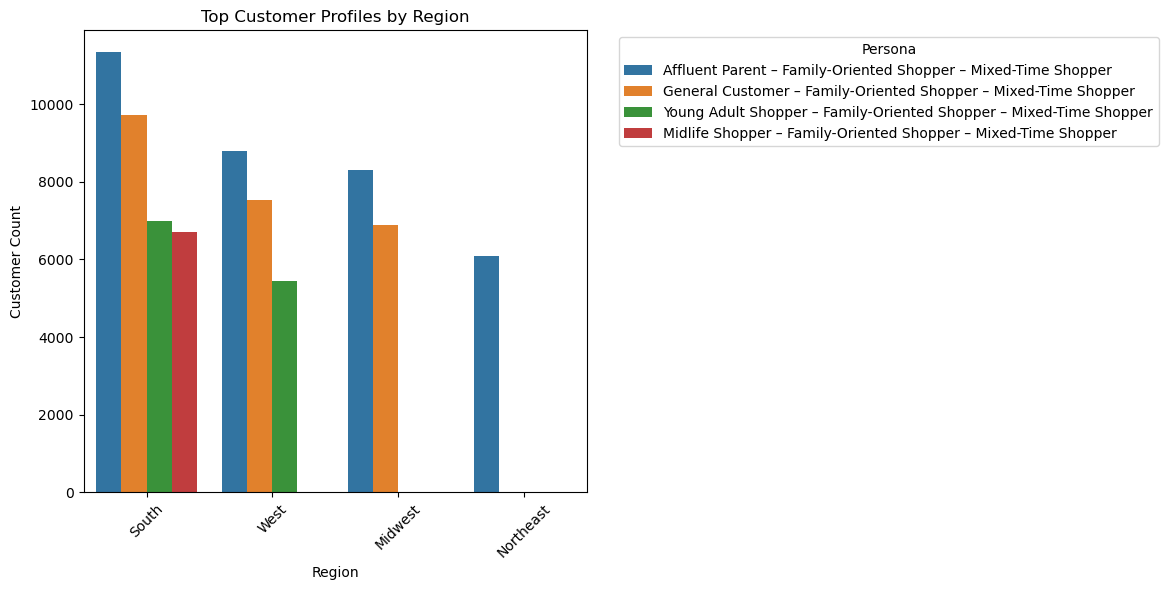

In [101]:
# Set up the figure
plt.figure(figsize=(12, 6))

# Barplot of top persona-region combinations
top_region_profiles = region_profile_counts.sort_values(by='count', ascending=False).head(10)
sns.barplot(data=top_region_profiles, x='region', y='count', hue='persona')

# Chart styling
plt.title('Top Customer Profiles by Region')
plt.xlabel('Region')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.legend(title='Persona', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top_region_profiles.png'), dpi=300)

plt.show()

#### Persona Engagement by Department

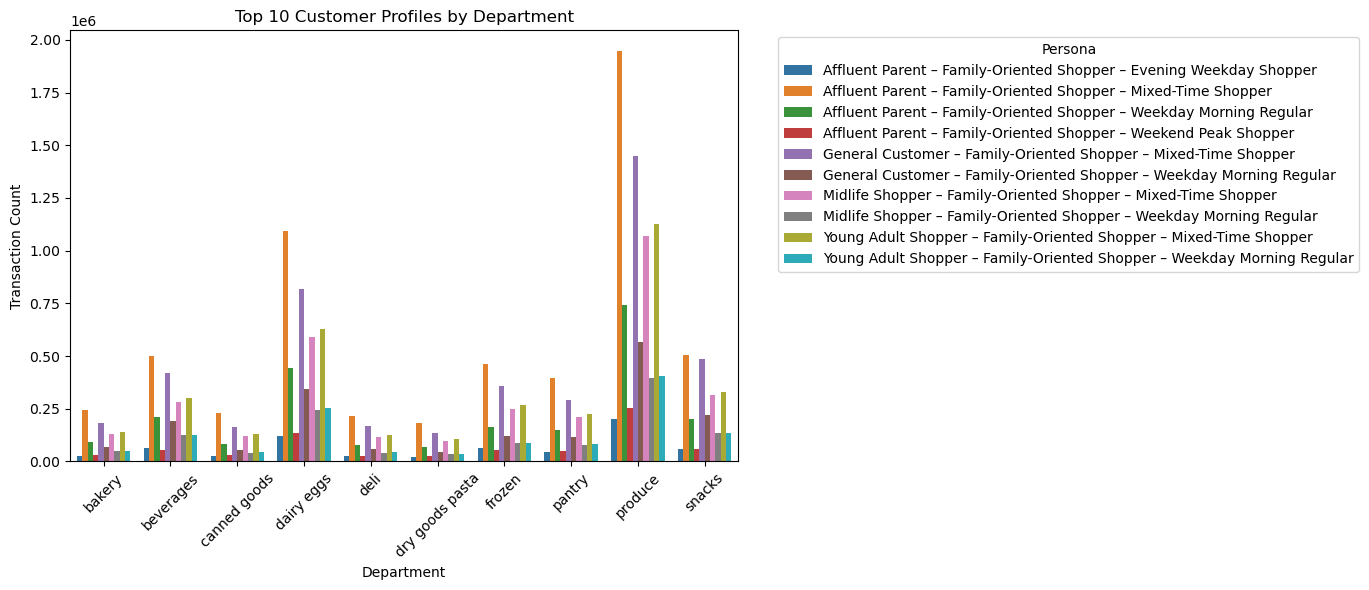

In [102]:
# Step 1: Get top 10 personas by total order volume
top_personas = (
    df_final_v4.groupby('persona')['order_id']
    .count()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)

# Step 2: Get top 10 departments overall
top_depts = (
    df_final_v4.groupby('department')['order_id']
    .count()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)

# Step 3: Filter data to top personas and departments
filtered = df_final_v4[
    df_final_v4['persona'].isin(top_personas) &
    df_final_v4['department'].isin(top_depts)
]

# Step 4: Aggregate counts
dept_profile_counts = (
    filtered.groupby(['department', 'persona'])['order_id']
    .count()
    .reset_index()
    .rename(columns={'order_id': 'count'})
)

# Step 5: Plot grouped vertical bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=dept_profile_counts, x='department', y='count', hue='persona')

# Step 6: Style chart
plt.title('Top 10 Customer Profiles by Department')
plt.xlabel('Department')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.legend(title='Persona', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# ✅ Step 7: Export chart to Visualizations folder
os.makedirs(os.path.join(path, '04 Analysis', 'Visualizations'), exist_ok=True)
plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'top10_personas_by_department_bar.png'),
    dpi=300,
    bbox_inches='tight'
)

plt.show()

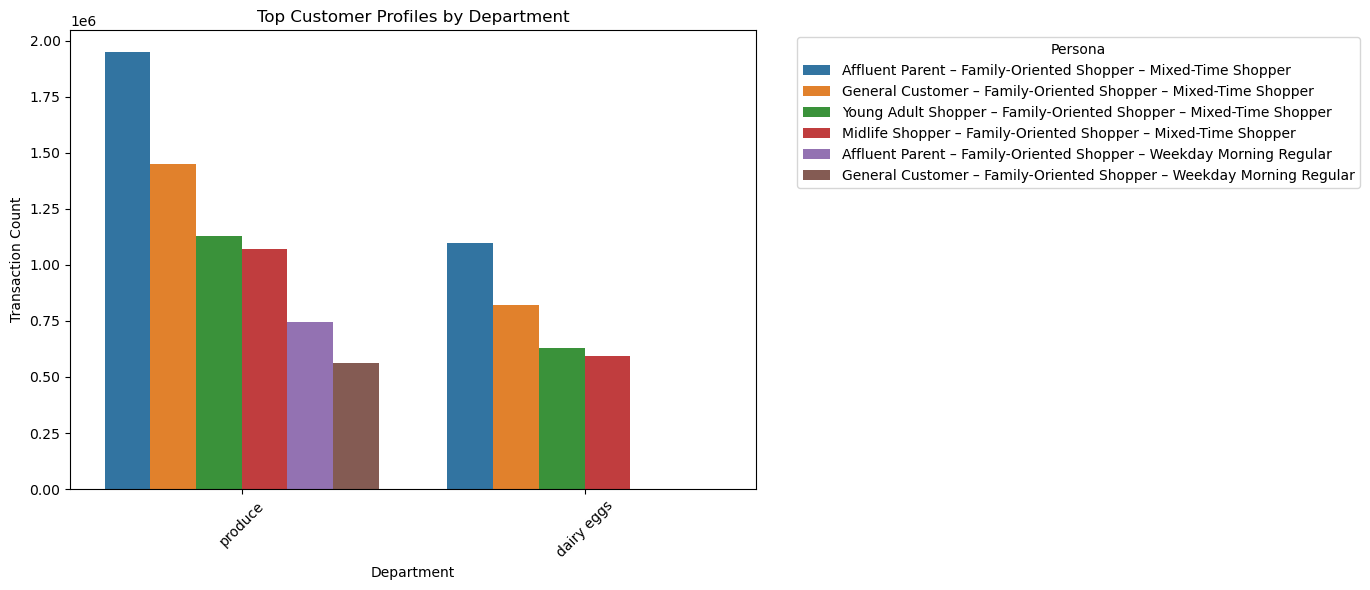

In [103]:
# Set up the figure
plt.figure(figsize=(14, 6))

# Top persona-department combinations
top_dept_profiles = dept_profile_counts.sort_values(by='count', ascending=False).head(10)
sns.barplot(data=top_dept_profiles, x='department', y='count', hue='persona')

# Chart styling
plt.title('Top Customer Profiles by Department')
plt.xlabel('Department')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.legend(title='Persona', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top_cust_profiles_dept.png'), dpi=300)

plt.show()

In [ ]:
# Step 1: Aggregate top 10 order segments by day and persona
treemap_data = (
    df_final_v4.groupby(['day_of_week', 'persona'])['order_id']
    .count()
    .reset_index()
    .rename(columns={'order_id': 'order_count'})
    .sort_values(by='order_count', ascending=False)
    .head(10)
)

# Step 2: Assign short labels and formatted block labels
treemap_data['short_label'] = ['Persona ' + str(i+1) for i in range(len(treemap_data))]
treemap_data['block_label'] = treemap_data.apply(
    lambda row: f"{row['short_label']}\n{row['order_count']:,}", axis=1
)

# Step 3: Plot treemap
fig, ax = plt.subplots(figsize=(14, 8))
squarify.plot(
    sizes=treemap_data['order_count'],
    label=treemap_data['block_label'],
    alpha=0.8,
    color=sns.color_palette('Blues', len(treemap_data)),
    text_kwargs={'fontsize': 12, 'weight': 'bold'},
    ax=ax
)

# Step 4: Style chart
ax.set_title('Top 10 Order Segments by Day and Persona', fontsize=16)
ax.axis('off')

# Step 5: Build legend text (no counts)
legend_lines = [
    f"{row['short_label']}: {row['persona']} ({row['day_of_week']})"
    for _, row in treemap_data.iterrows()
]
legend_text = '\n'.join(legend_lines)

# Step 6: Add legend outside the treemap (right side)
fig.subplots_adjust(right=0.7)  # Make space for legend
fig.text(
    0.72, 0.5, legend_text,
    fontsize=11,
    ha='left',
    va='center',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)

# Step 7: Export chart
os.makedirs(os.path.join(path, '04 Analysis', 'Visualizations'), exist_ok=True)
plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'top_10_order_segments_treemap_clean_legend.png'),
    dpi=300,
    bbox_inches='tight'
)

# Step 8: Show chart
plt.show()